<a href="https://colab.research.google.com/github/FabianaFerrente/ibis_pipeline/blob/master/dest_ibis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Mount Google Drive
drive.mount('/content/drive')


shared_folder_path = '/content/drive/MyDrive/dest_IBIS'

# List files in the shared folder
if os.path.exists(shared_folder_path):
    files = os.listdir(shared_folder_path)
    print(f"Files in '{shared_folder_path}':")
    for file in files:
        print(file)
else:
    print(f"Folder '{shared_folder_path}' not found.")

Mounted at /content/drive
Files in '/content/drive/MyDrive/dest_IBIS':
ref_WL.fits
8542_20150518_163819_BB_SO_s000.fits


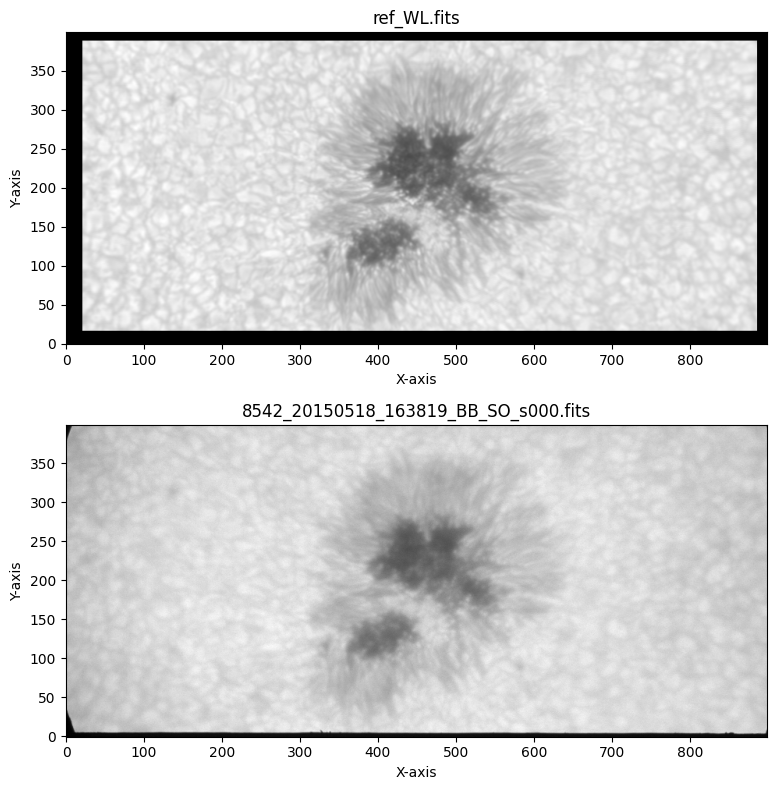

In [ ]:
# Define the paths to the FITS files
fits_file_path1 = '/content/drive/MyDrive/dest_IBIS/ref_WL.fits'
fits_file_path2 = '/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits'

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Read and plot the first FITS file
try:
    with fits.open(fits_file_path1) as hdul:
        image_data1 = hdul[0].data
        axes[0].imshow(image_data1[300:700,50:950], origin='lower', cmap='gray',aspect='equal')
        axes[0].set_title('ref_WL.fits')
        axes[0].set_xlabel('X-axis')
        axes[0].set_ylabel('Y-axis')
except FileNotFoundError:
    print(f"Error: FITS file not found at {fits_file_path1}")
except Exception as e:
    print(f"An error occurred with {fits_file_path1}: {e}")

# Read and plot the second FITS file
try:
    with fits.open(fits_file_path2) as hdul:
        image_data2 = hdul[0].data
        axes[1].imshow(image_data2[0,300:700,50:950], origin='lower', cmap='gray', aspect='equal')
        axes[1].set_title('8542_20150518_163819_BB_SO_s000.fits')
        axes[1].set_xlabel('X-axis')
        axes[1].set_ylabel('Y-axis')
except FileNotFoundError:
    print(f"Error: FITS file not found at {fits_file_path2}")
except Exception as e:
    print(f"An error occurred with {fits_file_path2}: {e}")

plt.tight_layout()
plt.show()

In [ ]:
print(flow)

[[[-6.3568853e-02 -9.1095321e-02]
  [-5.7473797e-01 -7.8782320e-01]
  [-2.9792998e+00 -2.6306114e+00]
  ...
  [ 2.0464108e+00 -8.4066525e-02]
  [ 2.0556567e+00  5.4306483e-01]
  [ 1.3185536e+00  1.2004410e+00]]

 [[-1.6828960e-01 -2.4469937e-01]
  [-1.5136271e+00 -1.9728276e+00]
  [-4.1443863e+00 -3.0631759e+00]
  ...
  [ 1.3843464e+00 -1.2700425e-02]
  [ 1.4298786e+00  6.1840904e-01]
  [ 8.1107199e-01  1.2818817e+00]]

 [[-4.8899594e-01 -5.1116365e-01]
  [-2.7026799e+00 -2.9081013e+00]
  [-4.4713202e+00 -3.0069888e+00]
  ...
  [ 1.1065353e+00  2.4745710e-02]
  [ 1.1654809e+00  6.5915763e-01]
  [ 5.9453630e-01  1.3265568e+00]]

 ...

 [[-1.5404366e+00 -1.4871563e+01]
  [-1.0559156e+00 -1.3506107e+01]
  [-8.5555738e-01 -1.2950061e+01]
  ...
  [-1.7419573e+00 -6.3219738e+00]
  [-2.0800400e+00 -6.3268881e+00]
  [-2.1499786e+00 -6.4051065e+00]]

 [[-3.2510344e-02 -1.0632549e+01]
  [ 3.4282026e-01 -9.5838919e+00]
  [ 4.4730425e-01 -9.2986660e+00]
  ...
  [-2.0761058e+00 -6.2940998e+00]
  [-

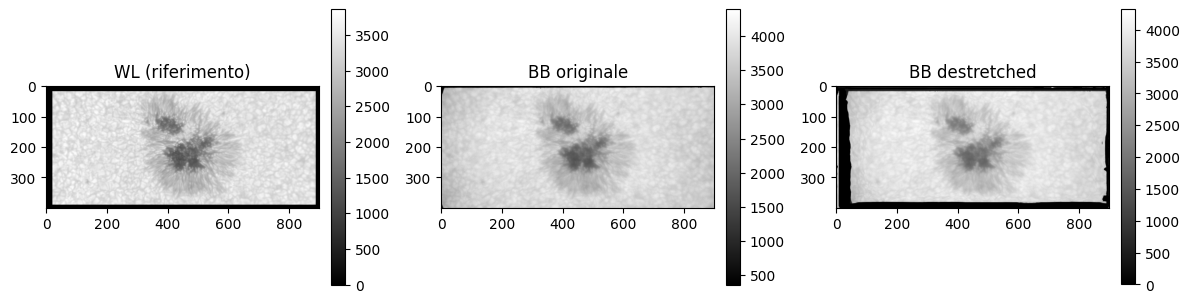

In [ ]:

# Carica le immagini dal FITS
with fits.open('/content/drive/MyDrive/dest_IBIS/ref_WL.fits') as hdul:
    wl = hdul[0].data.astype(np.float32)
    wl_crop = wl[300:700, 50:950]


with fits.open('/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits') as hdul:
    bb_cube = hdul[0].data.astype(np.float32)
    bb = bb_cube[0, 300:700, 50:950]  # primo frame, stessa regione






# Calcola il flusso ottico tra WL e BB
flow = cv2.calcOpticalFlowFarneback(wl_crop, bb, None,
                                    pyr_scale=0.5, levels=5, winsize=15,
                                    iterations=5, poly_n=6, poly_sigma=1.2, flags=0)

# Costruisci la mappa di rimappatura
h, w = wl_crop.shape
grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
map_x = (grid_x + flow[..., 0]).astype(np.float32)
map_y = (grid_y + flow[..., 1]).astype(np.float32)

# Applica la correzione
bb_corrected = cv2.remap(bb_norm, map_x, map_y, interpolation=cv2.INTER_LINEAR)
# Visualizza il confronto
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("WL (riferimento)")
im1 = plt.imshow(wl_crop, cmap='gray')
plt.colorbar(im1, fraction=0.046, pad=0.04)

plt.subplot(1,3,2)
plt.title("BB originale")
im2 = plt.imshow(bb, cmap='gray')
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
plt.title("BB destretched")
im3 = plt.imshow(bb_corrected, cmap='gray')
plt.colorbar(im3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()



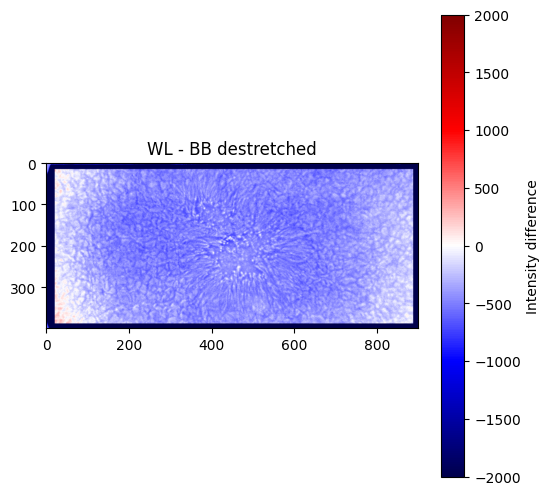

-699.76935
932.93604


In [ ]:
# Divide the destretched BB image from the WL image
subtracted_image = wl_crop-bb

# Display the subtracted image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='seismic', vmin=-2000, vmax=2000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

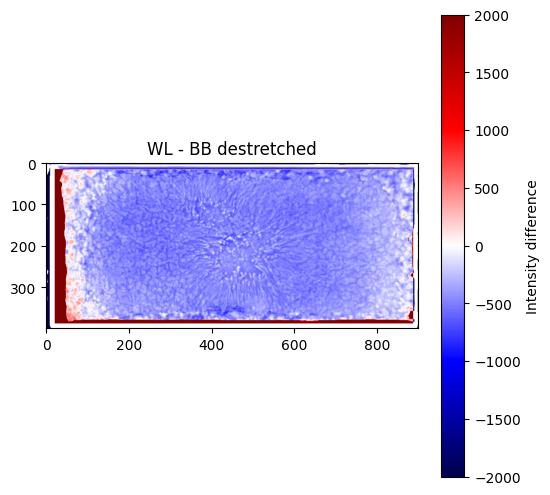

-245.14755
880.73926


In [ ]:
# Subtract the destretched BB image from the WL image
subtracted_image = wl_crop - bb_corrected

# Display the divided image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='seismic', vmin=-2000, vmax=2000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

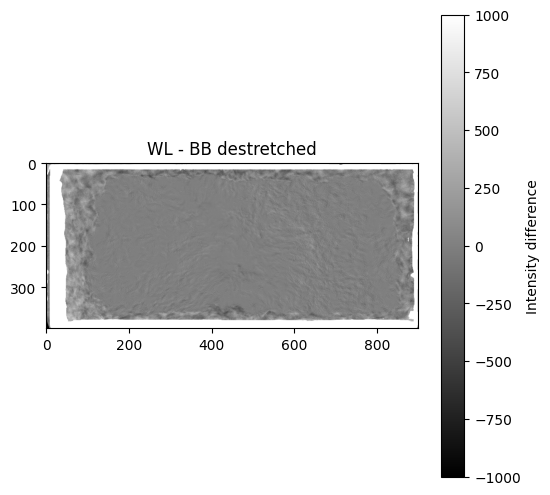

454.6217
1159.4087


In [ ]:
# Subtract the destretched BB image from the WL image
subtracted_image = bb - bb_corrected

# Display the divided image
plt.figure(figsize=(6, 6))
plt.title("WL - BB destretched")
plt.imshow(subtracted_image, cmap='gray', vmin=-1000, vmax=1000)
plt.colorbar(label='Intensity difference')
plt.show()


print(np.mean(subtracted_image))
print(np.std(subtracted_image))

8-bit

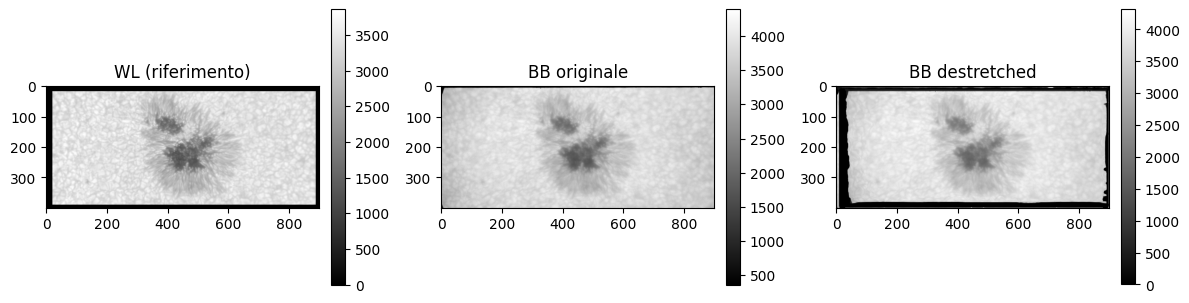

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def to_8bit(image):
    """Normalizza un'immagine in float e la converte in 8-bit uint8"""
    img_min, img_max = np.nanmin(image), np.nanmax(image)
    if img_max > img_min:
        norm_img = (image - img_min) / (img_max - img_min)
    else:
        norm_img = np.zeros_like(image)
    return (norm_img * 255).astype(np.uint8)

# Carica le immagini dal FITS
with fits.open('/content/drive/MyDrive/dest_IBIS/ref_WL.fits') as hdul:
    wl = hdul[0].data.astype(np.float32)
    wl_crop = wl[300:700, 50:950]
    wl_8bit = to_8bit(wl_crop)

with fits.open('/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits') as hdul:
    bb_cube = hdul[0].data.astype(np.float32)
    bb = bb_cube[0, 300:700, 50:950]
    bb_8bit = to_8bit(bb)

# Calcola il flusso ottico tra WL e BB
flow = cv2.calcOpticalFlowFarneback(
    wl_8bit, bb_8bit, None,
    pyr_scale=0.5, levels=5, winsize=15,
    iterations=5, poly_n=6, poly_sigma=1.2, flags=0
)

# Costruisci la mappa di rimappatura
h, w = wl_8bit.shape
grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
map_x = (grid_x + flow[..., 0]).astype(np.float32)
map_y = (grid_y + flow[..., 1]).astype(np.float32)

# Applica la correzione
bb_corrected = cv2.remap(bb, map_x, map_y, interpolation=cv2.INTER_LINEAR)

# Visualizza il confronto
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("WL (riferimento)")
im1 = plt.imshow(wl_crop, cmap='gray')
plt.colorbar(im1, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 2)
plt.title("BB originale")
im2 = plt.imshow(bb, cmap='gray')
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 3)
plt.title("BB destretched")
im3 = plt.imshow(bb_corrected, cmap='gray')
plt.colorbar(im3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


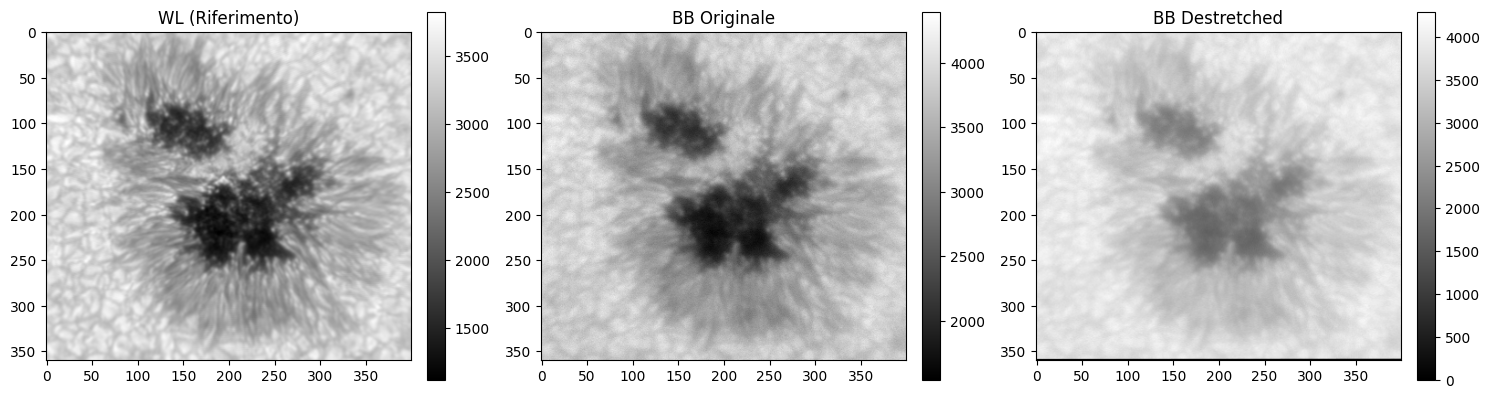

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def to_8bit(image):
    """Normalizza un'immagine in float e la converte in 8-bit uint8"""
    img_min, img_max = np.nanmin(image), np.nanmax(image)
    if img_max > img_min:
        norm_img = (image - img_min) / (img_max - img_min)
    else:
        norm_img = np.zeros_like(image)
    return (norm_img * 255).astype(np.uint8)

# Carica le immagini dal FITS
with fits.open('/content/drive/MyDrive/dest_IBIS/ref_WL.fits') as hdul:
    wl = hdul[0].data.astype(np.float32)
    wl_crop = wl[300:700, 50:950]

with fits.open('/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits') as hdul:
    bb_cube = hdul[0].data.astype(np.float32)
    bb = bb_cube[0, 300:700, 50:950]

# Pre-elaborazione per migliorare il contrasto
wl_8bit = to_8bit(wl_crop)
bb_8bit = to_8bit(bb)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
wl_enhanced = clahe.apply(wl_8bit)
bb_enhanced = clahe.apply(bb_8bit)

# Identificazione e corrispondenza dei punti chiave (Feature Matching)
orb = cv2.ORB_create(nfeatures=5000)
kp1, des1 = orb.detectAndCompute(wl_enhanced, None)
kp2, des2 = orb.detectAndCompute(bb_enhanced, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Estrazione dei punti corrispondenti
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Stima dell'omografia
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

# Applica la correzione
h, w = wl_crop.shape
bb_corrected = cv2.warpPerspective(bb, M, (w, h))

# Visualizza il confronto
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("WL (Riferimento)")
im1 = plt.imshow(wl_crop, cmap='gray')
plt.colorbar(im1, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 2)
plt.title("BB Originale")
im2 = plt.imshow(bb, cmap='gray')
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.subplot(1, 3, 3)
plt.title("BB Destretched")
im3 = plt.imshow(bb_corrected, cmap='gray')
plt.colorbar(im3, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

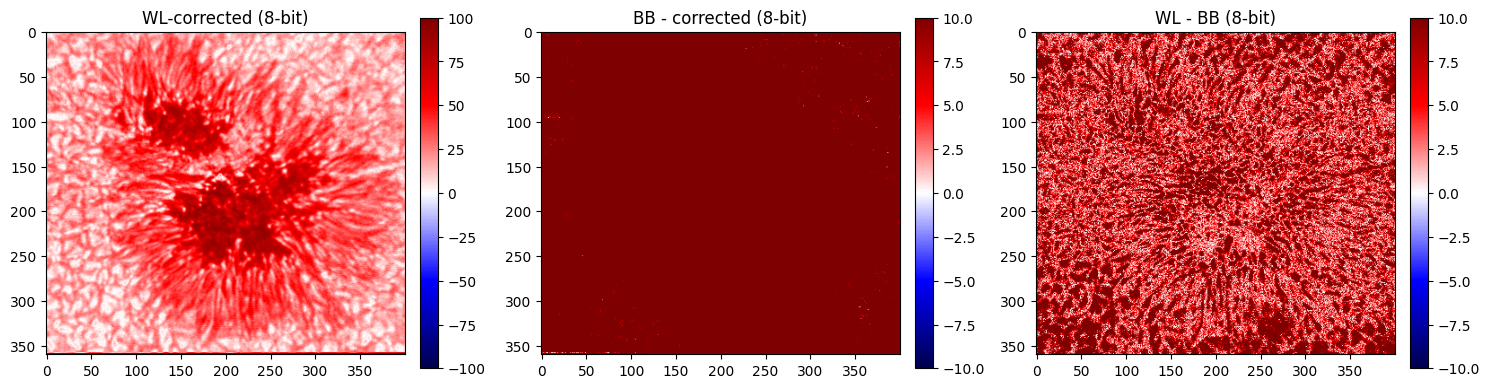

In [69]:


# Differenza anche sulle versioni 8-bit (più immediata da vedere)
bb_corrected_8bit = to_8bit(bb_corrected)
diff_wl8bit = cv2.absdiff(wl_8bit, bb_corrected_8bit)
diff_bb8bit = cv2.absdiff(bb_8bit, bb_corrected_8bit)
diff_wlbb8bit = cv2.absdiff(wl_8bit, bb_8bit)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("WL-corrected (8-bit)")
plt.imshow(diff_wl8bit, cmap='seismic', vmin=-100, vmax=100)
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1, 3, 2)
plt.title("BB - corrected (8-bit)")
plt.imshow(diff_bb8bit, cmap='seismic', vmin=-10, vmax=10)
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1, 3, 3)
plt.title("WL - BB (8-bit)")
plt.imshow(diff_wlbb8bit, cmap='seismic', vmin=-10, vmax=10)
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()




TEST THE METHOD

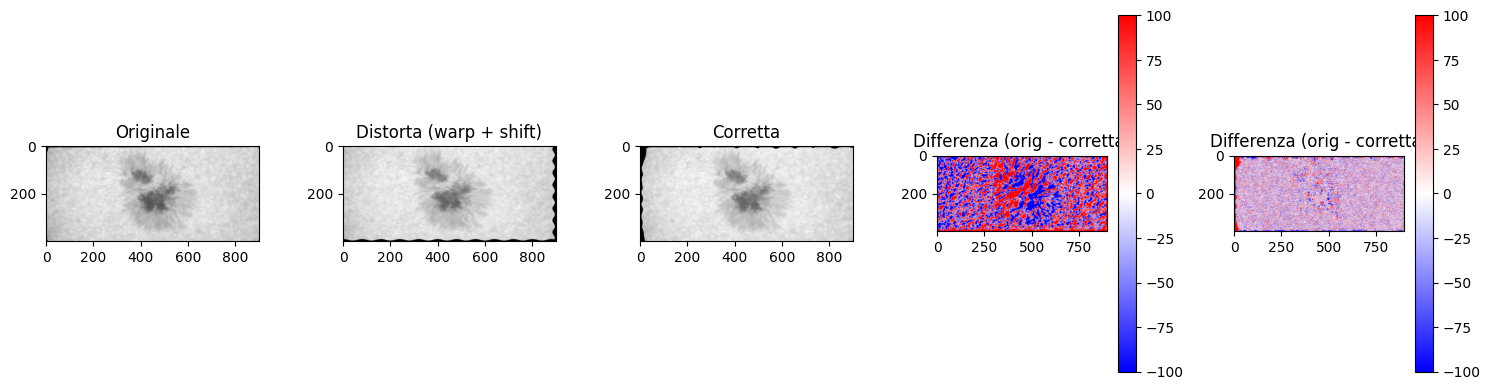

In [ ]:



h, w = bb.shape
grid_y, grid_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

# Distorsione: traslazione + sinusoidale
dist_x = 5 * np.sin(2 * np.pi * grid_y / 50)   # variazione orizzontale
dist_y = 3 * np.cos(2 * np.pi * grid_x / 80)   # variazione verticale
map_x = (grid_x + dist_x + 10).astype(np.float32)   # +10 pixel shift a dx
map_y = (grid_y + dist_y + 5).astype(np.float32)    # +5 pixel shift in basso

bb_distorted = cv2.remap(bb, map_x, map_y, interpolation=cv2.INTER_LINEAR)

# Calcola flusso ottico tra bb_norm e bb_distorted ---
flow = cv2.calcOpticalFlowFarneback(bb, bb_distorted, None,
                                    pyr_scale=0.5, levels=3, winsize=15,
                                    iterations=5, poly_n=6, poly_sigma=1.2, flags=0)

#  Rimappa la distorta per correggerla ---
map_x_corr = (grid_x + flow[...,0]).astype(np.float32)
map_y_corr = (grid_y + flow[...,1]).astype(np.float32)
bb_corrected = cv2.remap(bb_distorted, map_x_corr, map_y_corr, interpolation=cv2.INTER_LINEAR)

#  Visualizza ---
plt.figure(figsize=(15,4))

plt.subplot(1,5,1)
plt.title("Originale")
plt.imshow(bb, cmap='gray')

plt.subplot(1,5,2)
plt.title("Distorta (warp + shift)")
plt.imshow(bb_distorted, cmap='gray')

plt.subplot(1,5,3)
plt.title("Corretta")
plt.imshow(bb_corrected, cmap='gray')


plt.subplot(1,5,4)
plt.title("Differenza (orig - corretta)")
plt.imshow(bb - bb_distorted, cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()

plt.subplot(1,5,5)
plt.title("Differenza (orig - corretta)")
plt.imshow(bb - bb_corrected, cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()

plt.tight_layout()
plt.show()


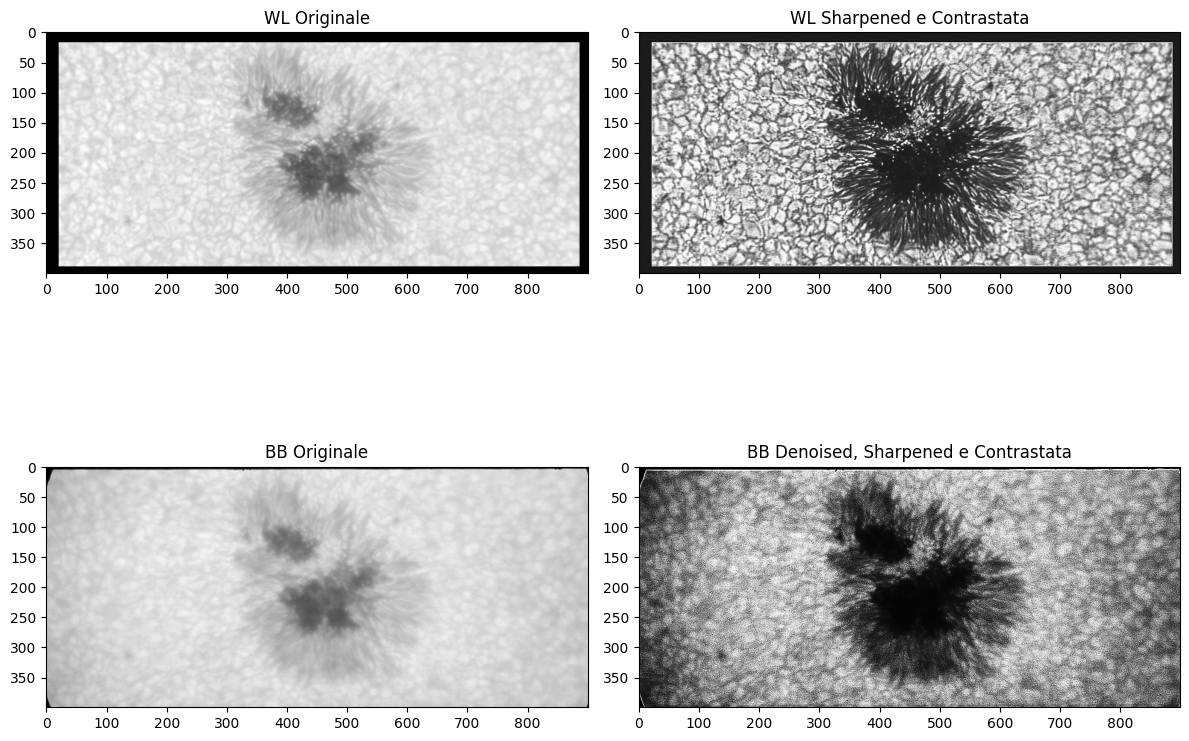

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d




# --- 2. Preparazione delle immagini ---
# Normalizziamo le immagini a 8-bit per la visualizzazione e l'equalizzazione
wl_8bit = cv2.normalize(wl, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
bb_8bit = cv2.normalize(bb, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Definisci il kernel di sharpening
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]], dtype=np.float32)

# --- 3. Elaborazione dell'immagine 'wl' ---
# Applica lo sharpening utilizzando scipy.signal.convolve2d per maggiore precisione
wl_sharpened = convolve2d(wl_8bit, sharpening_kernel, mode='same', boundary='symm')

# Normalizza il risultato e applica l'equalizzazione per il contrasto
wl_final = cv2.normalize(wl_sharpened, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
wl_final = cv2.equalizeHist(wl_final)
bb_float = bb_8bit.astype(np.float32)
# --- 4. Elaborazione dell'immagine 'bb' (Unsharp Masking Corretto) ---
# A. Sfuocare l'immagine BB
bb_blurred = cv2.GaussianBlur(bb_float, (3, 3), 0) # Usa un kernel 3x3 per meno sfocatura

# B. Creare la maschera (differenza tra originale e sfuocata)
bb_mask = cv2.subtract(bb_float, bb_blurred)

# C. Aggiungere la maschera all'immagine originale
weight = 5 # Aumenta il peso per un effetto più evidente
bb_sharpened = cv2.addWeighted(bb_float, 1.0, bb_mask, weight, 0)

# D. Normalizza il risultato in 8-bit e applica l'equalizzazione per il contrasto finale
bb_final = cv2.normalize(bb_sharpened, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
bb_final = cv2.equalizeHist(bb_final)



# --- 5. Visualizzazione dei risultati ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Visualizza i risultati per l'immagine 'wl'
axes[0, 0].imshow(wl, cmap='gray')
axes[0, 0].set_title('WL Originale')
axes[0, 1].imshow(wl_final, cmap='gray')
axes[0, 1].set_title('WL Sharpened e Contrastata')

# Visualizza i risultati per l'immagine 'bb'
axes[1, 0].imshow(bb, cmap='gray')
axes[1, 0].set_title('BB Originale')
axes[1, 1].imshow(bb_final, cmap='gray')
axes[1, 1].set_title('BB Denoised, Sharpened e Contrastata')

plt.tight_layout()
plt.show()

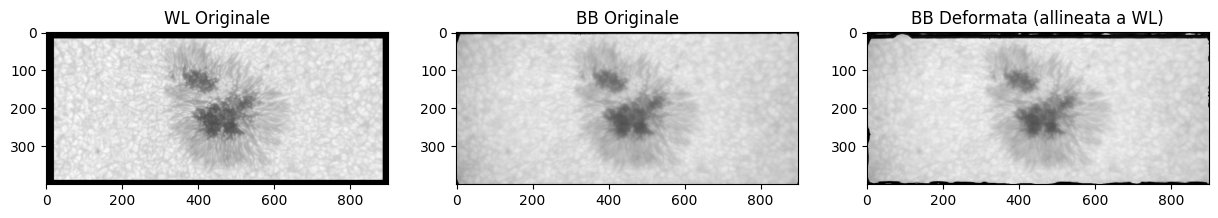

In [116]:

# I parametri possono essere ottimizzati a seconda delle tue immagini
flow = cv2.calcOpticalFlowFarneback(wl_final, bb_final, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Crea una griglia di coordinate dei pixel
h, w = wl_8bit.shape[:2]
y, x = np.indices((h, w))

# Aggiungi lo spostamento del flusso ottico alle coordinate
map_x = (x + flow[..., 0]).astype(np.float32)
map_y = (y + flow[..., 1]).astype(np.float32)

# Applica la trasformazione (remap) a 'bb' usando il flusso calcolato
# INTER_LINEAR è un'interpolazione comune, ma puoi provare anche altri
bb_warped = cv2.remap(bb_8bit, map_x, map_y, cv2.INTER_LINEAR)

# Visualizza i risultati
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(wl_8bit, cmap='gray')
axes[0].set_title('WL Originale')
axes[1].imshow(bb_8bit, cmap='gray')
axes[1].set_title('BB Originale')
axes[2].imshow(bb_warped, cmap='gray')
axes[2].set_title('BB Deformata (allineata a WL)')
plt.show()

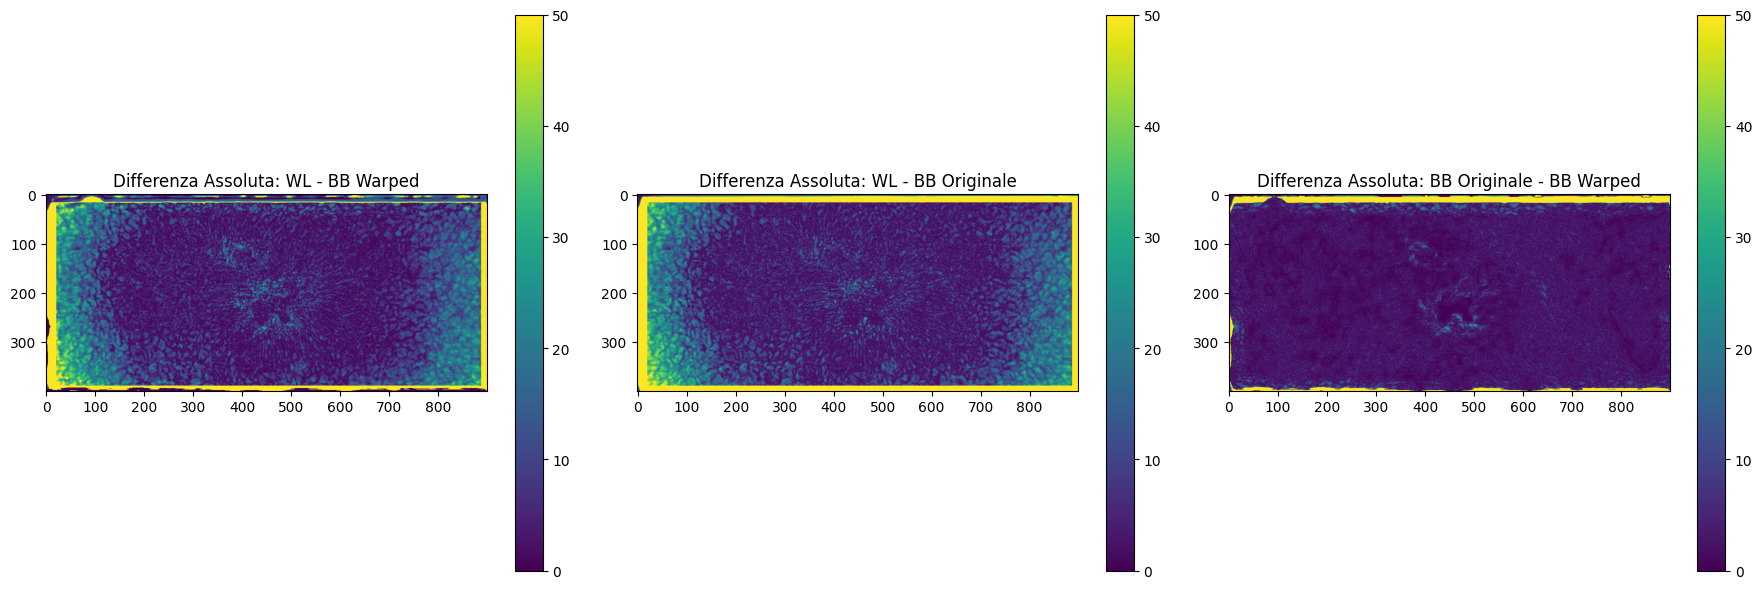

In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Converto le immagini in float32 per i calcoli di differenza
wl_float = wl_8bit.astype(np.float32)
bb_float = bb_8bit.astype(np.float32)
bb_warped_float = bb_warped.astype(np.float32)

# Calcolo le differenze
diff_wl_bb_warped = np.abs(wl_float - bb_warped_float)
diff_wl_bb_8bit = np.abs(wl_float - bb_float)
diff_bb_8bit_bb_warped = np.abs(bb_float - bb_warped_float)

# --- Visualizzazione dei risultati ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cmap = 'viridis'  # Una colormap che evidenzia le differenze

# Plot 1: Differenza tra WL e BB deformata
im1 = axes[0].imshow(diff_wl_bb_warped, cmap=cmap, vmax=50)
axes[0].set_title('Differenza Assoluta: WL - BB Warped')
fig.colorbar(im1, ax=axes[0], orientation='vertical')

# Plot 2: Differenza tra WL e BB originale (non allineata)
im2 = axes[1].imshow(diff_wl_bb_8bit, cmap=cmap,vmax=50)
axes[1].set_title('Differenza Assoluta: WL - BB Originale')
fig.colorbar(im2, ax=axes[1], orientation='vertical')

# Plot 3: Differenza tra BB originale e BB deformata
im3 = axes[2].imshow(diff_bb_8bit_bb_warped, cmap=cmap,vmax=50)
axes[2].set_title('Differenza Assoluta: BB Originale - BB Warped')
fig.colorbar(im3, ax=axes[2], orientation='vertical')

plt.tight_layout()
plt.show()

Script completato. L'immagine 'highpass_images.png' è stata salvata.


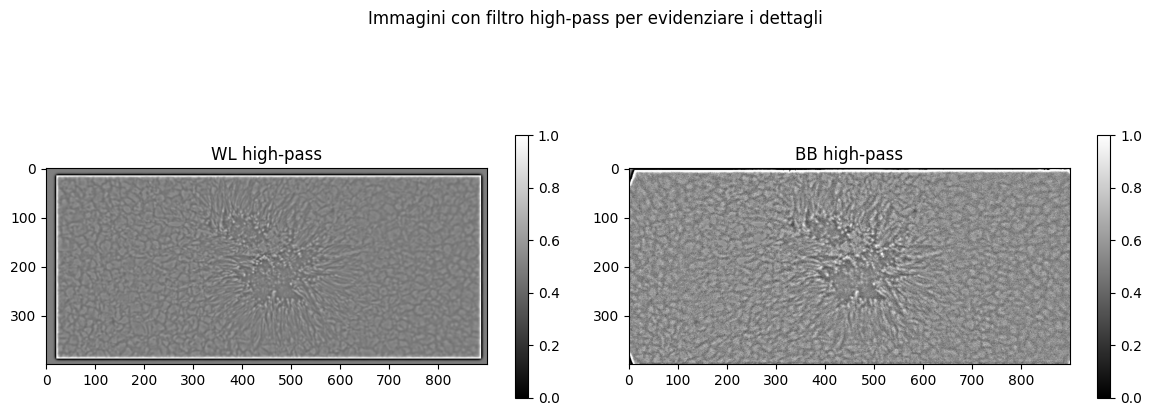

In [118]:
# Importa i pacchetti necessari
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import gaussian_filter

# ---------- Parametri da regolare ----------
# Assicurati che i percorsi dei file siano corretti per il tuo ambiente
wl_path = '/content/drive/MyDrive/dest_IBIS/ref_WL.fits'
bb_path = '/content/drive/MyDrive/dest_IBIS/8542_20150518_163819_BB_SO_s000.fits'
wl_slice = (300,700,50,950)
bb_frame_index = 0
# ------------------------------------------

def load_and_crop(wl_path, bb_path, wl_slice, bb_frame_index=0):
    """Carica e ritaglia le immagini FIT da disco."""
    y0,y1,x0,x1 = wl_slice
    with fits.open(wl_path) as hdul:
        wl = hdul[0].data.astype(np.float32)
        wl_crop = wl[y0:y1, x0:x1]
    with fits.open(bb_path) as hdul:
        bb_cube = hdul[0].data.astype(np.float32)
        bb = bb_cube[bb_frame_index, y0:y1, x0:x1]
    return wl_crop, bb

def stretch_contrast(img, pmin=1, pmax=99):
    """Normalizza il contrasto di un'immagine usando i percentili."""
    lo = np.percentile(img, pmin)
    hi = np.percentile(img, pmax)
    out = (img - lo) / (hi - lo + 1e-12)
    return np.clip(out, 0, 1)

def highpass(img, sigma=3, stretch=True):
    """Applica un filtro high-pass sottraendo un'immagine sfuocata."""
    low = gaussian_filter(img, sigma=sigma)
    hp = img - low
    if stretch:
        # Normalizza per una migliore visualizzazione
        lo, hi = np.percentile(hp, 1), np.percentile(hp, 99)
        hp = (hp - lo) / (hi - lo + 1e-12)
        hp = np.clip(hp, 0, 1)
    return hp

# Carica e ritaglia le immagini originali
wl, bb = load_and_crop(wl_path, bb_path, wl_slice, bb_frame_index=bb_frame_index)

# Normalizza il contrasto e applica il filtro high-pass
wl_st = stretch_contrast(wl)
bb_st = stretch_contrast(bb)
wl_hp = highpass(wl_st, sigma=3)
bb_hp = highpass(bb_st, sigma=3)

# Visualizza i risultati
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wl_hp, cmap='gray')
plt.title('WL high-pass')
plt.colorbar(shrink=0.6)

plt.subplot(1,2,2)
plt.imshow(bb_hp, cmap='gray')
plt.title('BB high-pass')
plt.colorbar(shrink=0.6)

plt.suptitle('Immagini con filtro high-pass per evidenziare i dettagli')
plt.tight_layout()

print("Script completato. L'immagine 'highpass_images.png' è stata salvata.")